In [23]:
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
quandl.ApiConfig.api_key = "K42xtcTyEM7To-P_MwmN"
import matplotlib.pyplot as plt

In [24]:
# Import the Data and get an overview of what is looks like.
# To analyze a different stock, enter the ticker symbol 
df = quandl.get("WIKI/MSFT")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


In [25]:
# We will be focusing on the Adj. Closing Price, which is the price the stock's closing price AFTER accounting for
# for any corporate actions.
# Below, we store it into a dataframe.

df = df[['Adj. Close']]
df.head()

,Adj. Close
Date,
1986-03-13,0.064720
1986-03-14,0.067031
1986-03-17,0.068187
1986-03-18,0.066454
1986-03-19,0.065298


In [26]:
# We use the variable below to store how long we want to predict, or forecast, the stock's behavior.
forecast_out = 30 # where 30 equals 30 days into the future
com = df[-30:] # store the last 30 days of data, we'll use this to compare it to our prediction
compare = com.to_numpy()

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

df.head()

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows, as will be predicting them and don't want to train on those values.
X = X[:-forecast_out]


### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])

# Get all of the y values except the last 'n' rows.
y = y[:-forecast_out]
print(y)

[7.80106897e-02 7.85885467e-02 7.62771188e-02 ... 8.71800000e+01
 9.37800000e+01 8.94700000e+01]


In [27]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the Linear Regression  Model
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0

lr_test = lr.score(x_test, y_test)
print("The accuracy score for the model is: ", lr_test)

The accuracy score for the model is:  0.9857348790077273


In [29]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[92.07661511 93.08258547 94.98161114 94.3041209  95.04320116 93.78060571
 94.0372308  96.41871165 97.81475214 96.5624217  96.12102654 95.17664621
 95.38194628 95.98758149 95.65910138 96.21341157 96.79851678 98.96443255
 99.20052763 96.77798677 96.20314657 96.54189169 96.97302184 95.21770622
 95.46406631 94.79684107 92.03555509 89.35638915 96.13129154 91.70707498]


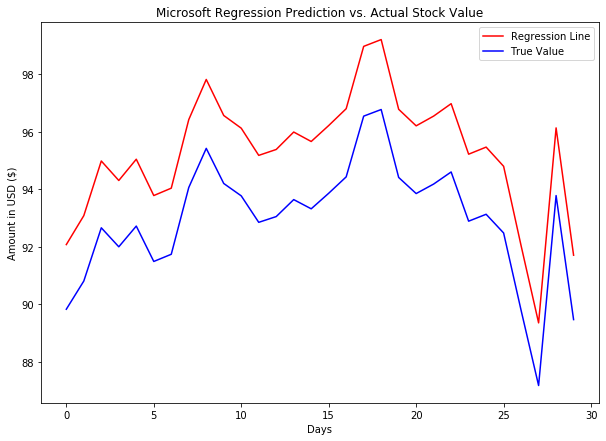

In [31]:
# Plotting prediction vs actual price over 30 day period
plt.figure(figsize=(10,7))
plt.plot(lr_prediction, c="red", label="Regression Line")
plt.plot(x_forecast, c="blue", label="True Value")
plt.title("Microsoft Regression Prediction vs. Actual Stock Value")
plt.xlabel("Days")
plt.ylabel("Amount in USD ($)")
plt.legend()

After running this model for a number of stocks: TSLA, MSFT, NVDA, NFLX, etc, we tend to see that the model has a tendency to overfit. We observe this as the regression analysis is producing misleading R-squared values. <br>
<br>
Overfit regression models have too many terms for the number of observations. By running this model multiple times for different stocks, we tend to see the model represent the noise rather than the genuine relationships within the stocks behavior.